# **1. Basic Data Loading and Data Preparation**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data_raw = 'final_dataset.csv'


In [ ]:
data = pd.read_csv(data_raw)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   message         3894 non-null   object
 1   classification  3894 non-null   object
dtypes: object(2)
memory usage: 61.0+ KB


In [ ]:
data.head()

,message,classification
0,एक डॉलर का ख़रीदारी ख़रीदारी के लिए अपने घर जा...,ham
1,"हर छोटी कोशिश का बड़ा परिणाम होता है, उसे नजरअ...",ham
2,क्या तुमने मेरे पिछले संदेश का जवाब दिया?,ham
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam
4,बिबाह में समस्या?❤️ प्यार को पाने का सही तरीका...,spam


In [ ]:
df = data

In [ ]:
df.drop_duplicates()

,message,classification
0,एक डॉलर का ख़रीदारी ख़रीदारी के लिए अपने घर जा...,ham
1,"हर छोटी कोशिश का बड़ा परिणाम होता है, उसे नजरअ...",ham
2,क्या तुमने मेरे पिछले संदेश का जवाब दिया?,ham
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam
4,बिबाह में समस्या?❤️ प्यार को पाने का सही तरीका...,spam
...,...,...
3889,मैं सोने जा रहा हूं... मुझे अब पढ़ाई करने का म...,ham
3890,हमने मुफ्त जियो मोबाइल + मुफ्त कैमकॉर्डर के लि...,spam
3891,मैं चाहता हूं कि आप मुझे बताएं कि कोलग में क्य...,ham
3892,मैं आपको प्यार करता हूं!,ham


In [ ]:
df.describe().T

,count,unique,top,freq
message,3894,3893,आपका बिजली बिल भुगतान की जानकारी । प्रिय ग्राह...,2
classification,3894,2,ham,2490


<ipython-input-11-ddb47a4bebc5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=data, palette=palette)


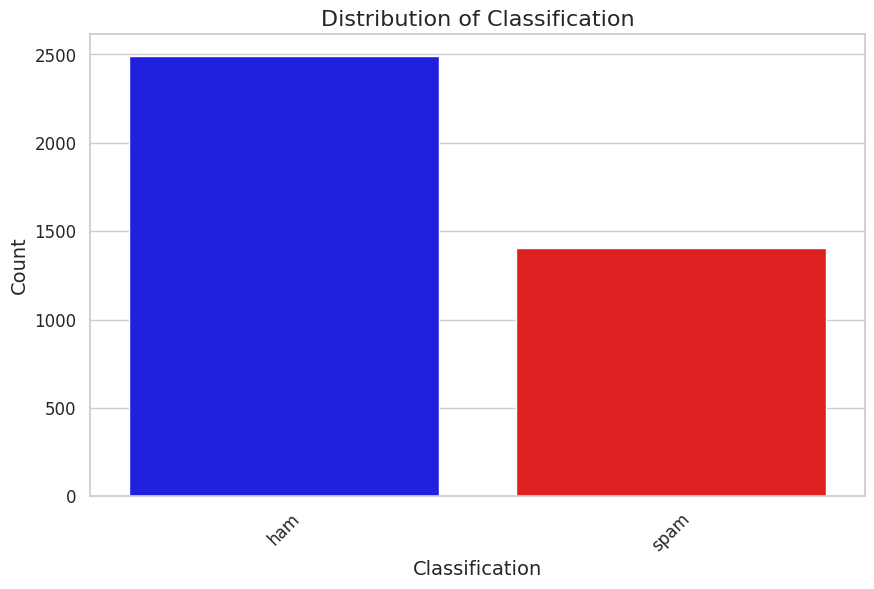

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = {'ham': 'blue', 'spam': 'red'}
sns.countplot(x='classification', data=data, palette=palette)

plt.title('Distribution of Classification', fontsize=16)
plt.xlabel('Classification', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
df['classification'].value_counts()

,count
classification,
ham,2490
spam,1404


**Stopwords removal**

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
indian_stopwords = set(stopwords.words('hinglish'))
print(indian_stopwords)
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in indian_stopwords]))
print(df.head())

{"won't", 'karenge', 'nai', 'vaisa', 'at', 'abhi', 'bolti', 'still', 'lest', 'hadn', 'tumhare', 'as', 'nahi', 'an', 'jaisa', 'kafi', 'kinn', 'pehli', 'tera', 'vahaan', 'huye', 'kuchh', 'aaj', 'follows', 'it', 'chal', 'itself', 'necessary', 'banaye', 'among', 'behind', 'denge', 'first', 'si', 'trying', 'usne', "couldn't", 'ap', 'fifth', 'much', 'arent', 'fir', 'chhaiye', 'nope', 'tune', "we've", 'now', 'around', "don't", 'phli', 'on', 'apne', 'wherever', 'everywhere', 'all', 'lol', 'ever', 'between', 'uss', 'meri', 'thodi', 'got', 'always', 'knows', 'na', 'seriously', 'kaisi', 'thinking', "wouldn't", 'kahte', 'whereupon', 'liya', 'kinka', 'khud', 'most', 'whoever', 'rahi', 'abbey', 'mean', "what's", 'aye', 'couldnt', 'needn', 'may', 'kal', "it's", 'somehow', 'wagaira', 'almost', 'dega', "who's", 'hadnt', 'vaale', 'hoga', 'kehte', 'gotten', 'wahaan', 'am', 'three', 'agar', 'became', 'sakte', 'soon', 'not', 'yaha', 'mano', 'below', 'again', 'arre', 'krne', 'everything', 'what', 'neednt', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
hindi_stopwords = {
    'के', 'का', 'एक', 'में', 'है', 'यह', 'और', 'से', 'हैं', 'को', 'पर', 'इस', 'होता', 'कि', 'जो', 'कर', 'मे',
    'गया', 'करने', 'किया', 'लिया', 'गये', 'अपने', 'हो', 'उन्हें', 'भी', 'पे', 'जैसा', 'तक', 'उनकी', 'ही',
    'अभी', 'इसके', 'साथ', 'अपना', 'आप', 'पूरी', 'उसके', 'बिलकुल', 'भीतर', 'उनका', 'था', 'सकते', 'इसमें',
    'दो', 'होने', 'वह', 'वे', 'करते', 'बहुत', 'कुछ', 'वो', 'करना', 'वर्ग', 'कई', 'करें', 'होती', 'अपनी',
    'उनको', 'जा', 'कहा', 'हुआ', 'जब', 'होते', 'कोई', 'हुई', 'वहाँ', 'जहाँ', 'मेरे', 'कुछ', 'सभी', 'करता',
    'उनकी', 'तरह', 'उस', 'आदि'}

df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in hindi_stopwords]))

print(df.head())

                                             message classification
0  डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...            ham
1  हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...            ham
2                  क्या तुमने पिछले संदेश जवाब दिया?            ham
3  प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...           spam
4  बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...           spam


In [ ]:
from collections import Counter


all_words = ' '.join(df['message']).split()
word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)

print(most_common_words)



[('लिए', 1198), ('की', 1092), ('है।', 892), ('मैं', 731), ('नहीं', 549), ('आपके', 532), ('मुझे', 509), ('तो', 493), ('करें।', 473), ('क्या', 456), ('हैं।', 345), ('आपको', 333), ('रहा', 326), ('कॉल', 310), ('कृपया', 294), ('आपका', 292), ('आपकी', 272), ('प्राप्त', 266), ('करें:', 249), ('है,', 239), ('-', 235), ('समय', 224), ('आज', 223), ('प्रिय', 211), ('किसी', 194), ('रुपये', 194), ('है!', 194), ('या', 187), ('है?', 183), ('यदि', 180), ('अब', 180), ('दिन', 179), ('क्लिक', 170), ('।', 170), ('2', 169), ('इसे', 166), ('केवल', 158), ('मैंने', 157), ('हम', 153), ('हूं', 153), ('हैं?', 152), ('अधिक', 150), ('तुम', 148), ('रहे', 146), ('सबसे', 144), ('लेकिन', 144), ('उत्तर', 138), ('जीवन', 136), ('जानकारी', 135), ('हूँ।', 134), ('न', 130), ('पास', 130), ('हर', 128), ('हैं,', 127), ('हमारे', 126), ('अगर', 125), ('एसएमएस', 124), ('आपने', 122), ('ने', 121), ('ग्राहक,', 119)]


In [ ]:
df.head()

,message,classification
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham
2,क्या तुमने पिछले संदेश जवाब दिया?,ham
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam


# **2. Feature Inclusion and Selection**

In [ ]:
#1. word count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))


In [ ]:
#2. character count
df['char_count'] = df['message'].apply(len)

counts all characters in the string, including:

    Letters: Hindi or any other script.
    Spaces.
    Punctuation marks: Periods, commas, exclamation marks, etc.
    Special characters: @, #, $, etc.
    Digits.

In [ ]:
#3.  average word length
df['avg_word_length'] = df['char_count'] / (df['word_count'] + 1e-5)


In [ ]:
#4. punctuations count (used for spam detection...exclamatory marks and all)
import string
df['punctuation_count'] = df['message'].apply(lambda x: sum(1 for char in x if char in string.punctuation))


In [ ]:
#5. link counting (important part...easy for spam detection if exists)
import re
df['link_count'] = df['message'].apply(lambda x: len(re.findall(r'(https?://\S+)', x)))


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.2 MB/s eta 0:00:00


In [ ]:
#6. Emoji Count
import emoji
df['emoji_count'] = df['message'].apply(lambda x: sum(1 for char in x if emoji.is_emoji(char)))


In [ ]:
df

,message,classification,word_count,char_count,avg_word_length,punctuation_count,link_count,emoji_count
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham,15,76,5.066663,0,0,0
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham,10,50,4.999995,1,0,0
2,क्या तुमने पिछले संदेश जवाब दिया?,ham,6,33,5.499991,1,0,0
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam,21,155,7.380949,10,0,0
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam,17,114,6.705878,2,0,4
...,...,...,...,...,...,...,...,...
3889,"मैं सोने रहा हूं... मुझे अब पढ़ाई मन नहीं है, ...",ham,25,140,5.599998,10,0,0
3890,हमने मुफ्त जियो मोबाइल + मुफ्त कैमकॉर्डर लिए ह...,spam,23,133,5.782606,1,0,0
3891,"मैं चाहता हूं मुझे बताएं कोलग क्या होगा, क्या ...",ham,43,235,5.465115,6,0,0
3892,मैं आपको प्यार हूं!,ham,4,19,4.749988,1,0,0


In [ ]:
#7. spam keywords count
spam_keywords = [
    'मुफ्त', 'ऑफर', 'डिस्काउंट', 'पुरस्कार', 'रुपये', 'जीते',
    'रेफरल', 'प्राप्त', 'क्लिक', 'ग्रैंड', 'निःशुल्क', 'गाड़ी',
    'बेचना', 'जल्दी', 'https', 'com', 'भुगतान', 'पंजीकरण',
    'धन', '000', 'लिंक', 'सदस्य', 'पैसे', 'पुरस्कृत', 'इनाम', 'ऑफ़र', 'फ्री', 'जीतो',
    'ऑफर', 'जरूरी', '100%', 'निःशुल्क', 'संतुष्ट',
    'आय', 'मालिक', 'कीमत', 'रकम', 'बोनस', 'डॉलर', 'दोगुनी',
    'कमाएँ', 'पैसे', 'कर्ज', 'नकदी', 'स्वतंत्रता', 'उपहार',
    'होस्टिंग', 'सदस्यता', 'पैसा', 'पूर्वावलोकन', 'बोली', 'परीक्षण',
    'वापसी', 'गिफ्ट', 'भुगतान', 'गारंटी', 'बिक्री', 'ट्रैफ़िक',
    'सौदा', 'दर', 'मूल्य', 'मिलियन', 'चमत्कार', 'पुरस्कार', 'जोखिम',
    'संतुष्टि', 'प्रमोशन', 'अप्लाई', 'सदस्य', 'क्लिक', 'तुरंत',
    'सीमित', 'ऑर्डर', 'विजेता', 'रद्द', 'बधाई', 'गोपनीय', 'इलाज',
    'प्रिय', 'विपणन', 'स्पैम', 'असुरक्षित', 'लाभ', 'निवेश',
    'जीवनभर', 'ऋण', 'नाम', 'ब्रांड', 'उद्धरण', 'दरें', 'पुनर्वित्त',
    'वेब', 'काम', 'घर', 'सिक्योर', 'रिफंड', 'लॉटरी', 'ग्रैंड',
    'ग्राहक', 'बधाई हो', 'कस्टमर', 'रिटेल', 'क्लिक', 'दबाओ',
    'मौका', 'ड्रॉ', 'लिंक', 'अधूरा', 'असीमित', 'अनलिमिटेड', 'ऑफर', 'जरूरी','#1','100% अधिक',
'100% निःशुल्क',
'जल्दी करें',
'छूट','एक्स्ट्रा','कोड का उपयोग करें','अभी खरीदारी करें','फ्लैट','इस त्योहारी सीज़न में','क्रेडिट कार्ड ऑफर','जल्द ही आ रहा है','कॉलर्ट्यून्स','नमस्ते!','लिंक वर क्लिक करा','लेंसकार्ट','बेस्ट प्लान्स','हम आपसे सुनने','क्लिक','प्रधानमंत्री आवास योजना','लिंक पर क्लिक करें','अधिक जानकारी',
'वाउचर','विश्व टेलीकम्युनिकेशन','मेज़बानी','प्रधानमंत्री','लिंक',
'100% संतुष्ट',
'अतिरिक्त आय',
'अपने खुद के मालिक बनें',
'सबसे अच्छी कीमत',
'बड़ी रकम',
'एक अरब',
'नकद बोनस',
'डॉलर पर सेंट',
'ऋण समेकित करें',
'अपनी नकदी दोगुनी करें',
'अपनी आय दोगुनी करें',
'अतिरिक्त नकदी कमाएँ',
'पैसे कमाएं',
'खराब क्रेडिट को खत्म करें',
'अतिरिक्त नकदी',
'अतिरिक्त आय',
'कमाने की उम्मीद',
'तेजी से नकदी',
'वित्तीय स्वतंत्रता',
'निःशुल्क पहुंच',
'निःशुल्क परामर्श',
'मुफ्त उपहार',
'मुफ़्त होस्टिंग',
'निःशुल्क जानकारी',
'निःशुल्क निवेश',
'नि: शुल्क सदस्यता',
'मुफ़्त पैसा',
'निःशुल्क पूर्वावलोकन',
'मुक्त बोली',
'मुफ्त परीक्षण',
'पूर्ण वापसी',
'कर्ज से बाहर निकलें',
'भुगतान प्राप्त करना',
'दे दो',
'गारंटी',
'बिक्री बढ़ाएँ',
'ट्रैफ़िक बढ़ाएँ',
'अविश्वसनीय सौदा',
'कम दर',
'सबसे कम कीमत',
'पैसा बनाएं',
'मिलियन डॉलर',
'चमत्कार',
'पैसा वापस',
'जीवन में एक बार',
'वन टाइम',
'एक दिन में पैसे',
'संभावित आय',
'पुरस्कार',
'वादा',
'शुद्ध लाभ',
'जोखिम मुक्त',
'संतुष्टि की गारंटी',
'खूब सारा पैसा बचाएँ',
'को जमा करना',
'विशेष प्रमोशन',
'अभी कदम उठाएं',
'अभी अप्लाई करें',
'सदस्य बनें',
'अब कॉल करें',
'नीचे क्लिक करें',
'यहाँ क्लिक करें',
'अब समझे',
'इसे आज करो',
'न हटाएं',
'विशेष सौदा',
'अब शुरू हो जाओ',
'के संबंध में महत्वपूर्ण जानकारी',
'आपके द्वारा अनुरोधित जानकारी',
'तुरंत',
'सीमित समय',
'केवल नए ग्राहकों के लिए',
'अब ऑर्डर दें',
'कृपया पढ़ें',
'अपने लिए देखलो',
'निशुल्क साइन अप करें',
'कार्यवाही करना',
'यह लंबे समय तक नहीं चलेगा',
'अति आवश्यक',
'आप किस का इंतजार कर रहे हैं?',
'पिछली आपूर्ति का समय',
'अपनी आँखों पर यकीन नहीं होगा',
'विजेता',
'जीत',
'आप विजेता हैं',
'आपका चयन हो गया है',
'थोक ईमेल',
'सीधे खरीदें',
'किसी भी समय रद्द करें',
'चेक या मनी ऑर्डर',
'बधाई हो',
'गोपनीयता',
'इलाज',
'प्रिय मित्र',
'प्रत्यक्ष ईमेल',
'सीधा विपणन',
'छिपे हुए शुल्क',
'मानव विकास हार्मोन',
'इंटरनेट विपणन',
'वजन कम करें',
'सामूहिक ईमेल',
'एकल व्यक्तियों से मिलें',
'मल्टी लेवल मार्केटिंग',
'कोई पकड़ नहीं',
'कोई लागत नहीं अाना',
'कोई क्रेडिट जाँच नहीं',
'कोई शुल्क नहीं',
'कोई नौटंकी नहीं',
'कोई छुपी हुई लागत नहीं',
'कोई छुपी हुई फीस नहीं',
'कोई ब्याज नहीं',
'कोई निवेश नहीं',
'कोई बाध्यता नहीं',
'कोई आवश्यक खरीद नहीं',
'कोई प्रश्न नहीं पूछा गया',
'कोई सेटिंग संलग्न नहीं है',
'कबाड़ नहीं',
'नॉटस्पैम',
'दायित्व',
'पासवर्डों',
'प्रारंभिक निवेश की आवश्यकता है',
'सामाजिक सुरक्षा संख्या',
'यह कोई घोटाला नहीं है',
'यह कबाड़ नहीं है',
'यह स्पैम नहीं है',
'अप्रकाशित',
'असुरक्षित ऋण',
'असुरक्षित ऋण',
'अनचाही',
'वैलियम',
'वियाग्रा',
'विकोडिन',
'हम स्पैम से नफरत करते हैं',
'वजन घटाना',
'क्रेडिट कार्ड स्वीकार करें',
'विज्ञापन',
'एकदम नया',
'पर देखा',
'सौदा',
'लाभार्थी',
'बिलिंग',
'बोनस',
'स्वीकृत कार्ड',
'नकद',
'प्रमाणित',
'सस्ता',
'दावा',
'निकासी',
'दरों की तुलना करें',
'क्रेडिट कार्ड ऑफर',
'सौदा',
'ऋृण',
'छूट',
'ज़बरदस्त',
'कानून के अनुसार',
'आय',
'निवेश',
'लाखों लोगों से जुड़ें',
'जीवनभर',
'ऋण',
'विलासिता',
'विपणन समाधान',
'संदेश में शामिल है',
'गिरवी दरों',
'नाम ब्रांड',
'प्रस्ताव',
'ऑनलाइन मार्केटिंग',
'में चुनें',
'पूर्व-अनुमोदित',
'उद्धरण',
'दरें',
'पुनर्वित्त',
'हटाना',
'अधिकार सुरक्षित रखता है',
'अंक',
'खोज इंजन',
'अनुपालन में भेजा गया',
'का विषय है…',
'नियम और शर्तें',
'परीक्षण',
'असीमित',
'गारंटी',
'वेब ट्रैफ़िक',
'घर से काम करें', 'जीतो', 'ऑफर', 'जरूरी','#1','100% अधिक',
'100% निःशुल्क',
'जल्दी करें',
'छूट','एक्स्ट्रा','कोड का उपयोग करें','अभी खरीदारी करें','फ्लैट','इस त्योहारी सीज़न में','क्रेडिट कार्ड ऑफर','जल्द ही आ रहा है','कॉलर्ट्यून्स','नमस्ते!','लिंक वर क्लिक करा','लेंसकार्ट','बेस्ट प्लान्स','हम आपसे सुनने','क्लिक','प्रधानमंत्री आवास योजना','लिंक पर क्लिक करें','अधिक जानकारी',
'वाउचर','विश्व टेलीकम्युनिकेशन','मेज़बानी','प्रधानमंत्री','लिंक',
'100% संतुष्ट',
'अतिरिक्त आय',
'अपने खुद के मालिक बनें',
'सबसे अच्छी कीमत',
'बड़ी रकम',
'एक अरब',
'नकद बोनस',
'डॉलर पर सेंट',
'ऋण समेकित करें',
'अपनी नकदी दोगुनी करें',
'अपनी आय दोगुनी करें',
'अतिरिक्त नकदी कमाएँ',
'पैसे कमाएं',
'खराब क्रेडिट को खत्म करें',
'अतिरिक्त नकदी',
'अतिरिक्त आय',
'कमाने की उम्मीद',
'तेजी से नकदी',
'वित्तीय स्वतंत्रता',
'निःशुल्क पहुंच',
'निःशुल्क परामर्श',
'मुफ्त उपहार',
'मुफ़्त होस्टिंग',
'निःशुल्क जानकारी',
'निःशुल्क निवेश',
'नि: शुल्क सदस्यता',
'मुफ़्त पैसा',
'निःशुल्क पूर्वावलोकन',
'मुक्त बोली',
'मुफ्त परीक्षण',
'पूर्ण वापसी',
'कर्ज से बाहर निकलें',
'भुगतान प्राप्त करना',
'दे दो',
'गारंटी',
'बिक्री बढ़ाएँ',
'ट्रैफ़िक बढ़ाएँ',
'अविश्वसनीय सौदा',
'कम दर',
'सबसे कम कीमत',
'पैसा बनाएं',
'मिलियन डॉलर',
'चमत्कार',
'पैसा वापस',
'जीवन में एक बार',
'वन टाइम',
'एक दिन में पैसे',
'संभावित आय',
'पुरस्कार',
'वादा',
'शुद्ध लाभ',
'जोखिम मुक्त',
'संतुष्टि की गारंटी',
'खूब सारा पैसा बचाएँ',
'को जमा करना',
'विशेष प्रमोशन',
'अभी कदम उठाएं',
'अभी अप्लाई करें',
'सदस्य बनें',
'अब कॉल करें',
'नीचे क्लिक करें',
'यहाँ क्लिक करें',
'अब समझे',
'इसे आज करो',
'न हटाएं',
'विशेष सौदा',
'अब शुरू हो जाओ',
'के संबंध में महत्वपूर्ण जानकारी',
'आपके द्वारा अनुरोधित जानकारी',
'तुरंत',
'सीमित समय',
'केवल नए ग्राहकों के लिए',
'अब ऑर्डर दें',
'कृपया पढ़ें',
'अपने लिए देखलो',
'निशुल्क साइन अप करें',
'कार्यवाही करना',
'यह लंबे समय तक नहीं चलेगा',
'अति आवश्यक',
'आप किस का इंतजार कर रहे हैं?',
'पिछली आपूर्ति का समय',
'अपनी आँखों पर यकीन नहीं होगा',
'विजेता',
'जीत',
'आप विजेता हैं',
'आपका चयन हो गया है',
'थोक ईमेल',
'सीधे खरीदें',
'किसी भी समय रद्द करें',
'चेक या मनी ऑर्डर',
'बधाई हो',
'गोपनीयता',
'इलाज',
'प्रिय मित्र',
'प्रत्यक्ष ईमेल',
'सीधा विपणन',
'छिपे हुए शुल्क',
'मानव विकास हार्मोन',
'इंटरनेट विपणन',
'वजन कम करें',
'सामूहिक ईमेल',
'एकल व्यक्तियों से मिलें',
'मल्टी लेवल मार्केटिंग',
'कोई पकड़ नहीं',
'कोई लागत नहीं अाना',
'कोई क्रेडिट जाँच नहीं',
'कोई शुल्क नहीं',
'कोई नौटंकी नहीं',
'कोई छुपी हुई लागत नहीं',
'कोई छुपी हुई फीस नहीं',
'कोई ब्याज नहीं',
'कोई निवेश नहीं',
'कोई बाध्यता नहीं',
'कोई आवश्यक खरीद नहीं',
'कोई प्रश्न नहीं पूछा गया',
'कोई सेटिंग संलग्न नहीं है',
'कबाड़ नहीं',
'नॉटस्पैम',
'दायित्व',
'पासवर्डों',
'प्रारंभिक निवेश की आवश्यकता है',
'सामाजिक सुरक्षा संख्या',
'यह कोई घोटाला नहीं है',
'यह कबाड़ नहीं है',
'यह स्पैम नहीं है',
'अप्रकाशित',
'असुरक्षित ऋण',
'असुरक्षित ऋण',
'अनचाही',
'वैलियम',
'वियाग्रा',
'विकोडिन',
'हम स्पैम से नफरत करते हैं',
'वजन घटाना',
'क्रेडिट कार्ड स्वीकार करें',
'विज्ञापन',
'एकदम नया',
'पर देखा',
'सौदा',
'लाभार्थी',
'बिलिंग',
'बोनस',
'स्वीकृत कार्ड',
'नकद',
'प्रमाणित',
'सस्ता',
'दावा',
'निकासी',
'दरों की तुलना करें',
'क्रेडिट कार्ड ऑफर',
'सौदा',
'ऋृण',
'छूट',
'ज़बरदस्त',
'कानून के अनुसार',
'आय',
'निवेश',
'लाखों लोगों से जुड़ें',
'जीवनभर',
'ऋण',
'विलासिता',
'विपणन समाधान',
'संदेश में शामिल है',
'गिरवी दरों',
'नाम ब्रांड',
'प्रस्ताव',
'ऑनलाइन मार्केटिंग',
'में चुनें',
'पूर्व-अनुमोदित',
'उद्धरण',
'दरें',
'पुनर्वित्त',
'हटाना',
'अधिकार सुरक्षित रखता है',
'अंक',
'खोज इंजन',
'अनुपालन में भेजा गया',
'का विषय है…',
'नियम और शर्तें',
'परीक्षण',
'असीमित',
'गारंटी',
'वेब ट्रैफ़िक',
'घर से काम करें']

df['spam_keyword_count'] = df['message'].apply(
    lambda x: sum(1 for word in x.split() if word in spam_keywords)
)




In [ ]:
#8. currency symbol and money count (another important step)
import re

currency_symbols = ['₹', '$', '€', '£', '¥', '₽', '₩', '₺', '₱', 'Rs', 'rs', 'रुपये', 'रु']
money_pattern = re.compile(r'\b\d{1,4}(,\d{3})*(\.\d{1,2})?\b')

def count_currency_symbols(message):
    symbol_count = sum(1 for char in message if char in currency_symbols)
    money_count = len(money_pattern.findall(message))
    return symbol_count + money_count

df['currency_symbol_count'] = df['message'].apply(count_currency_symbols)



In [ ]:
#9. phone number count
import re

phone_number_pattern = r'(\+91[-\s]?)?(0)?[6-9]\d{8,13}\b'

df['phone_number_count'] = df['message'].apply(
    lambda x: len(re.findall(phone_number_pattern, x))
)



In [ ]:
df

,message,classification,word_count,char_count,avg_word_length,punctuation_count,link_count,emoji_count,spam_keyword_count,currency_symbol_count,phone_number_count
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham,15,76,5.066663,0,0,0,2,0,0
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham,10,50,4.999995,1,0,0,0,0,0
2,क्या तुमने पिछले संदेश जवाब दिया?,ham,6,33,5.499991,1,0,0,0,0,0
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam,21,155,7.380949,10,0,0,2,6,0
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam,17,114,6.705878,2,0,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3889,"मैं सोने रहा हूं... मुझे अब पढ़ाई मन नहीं है, ...",ham,25,140,5.599998,10,0,0,0,0,0
3890,हमने मुफ्त जियो मोबाइल + मुफ्त कैमकॉर्डर लिए ह...,spam,23,133,5.782606,1,0,0,2,0,1
3891,"मैं चाहता हूं मुझे बताएं कोलग क्या होगा, क्या ...",ham,43,235,5.465115,6,0,0,1,0,0
3892,मैं आपको प्यार हूं!,ham,4,19,4.749988,1,0,0,0,0,0


# **((DATA VISUALIZATION))**

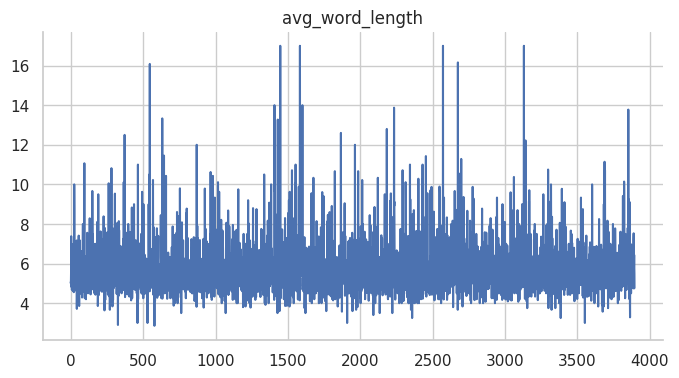

In [ ]:
from matplotlib import pyplot as plt
df['avg_word_length'].plot(kind='line', figsize=(8, 4), title='avg_word_length')
plt.gca().spines[['top', 'right']].set_visible(False)

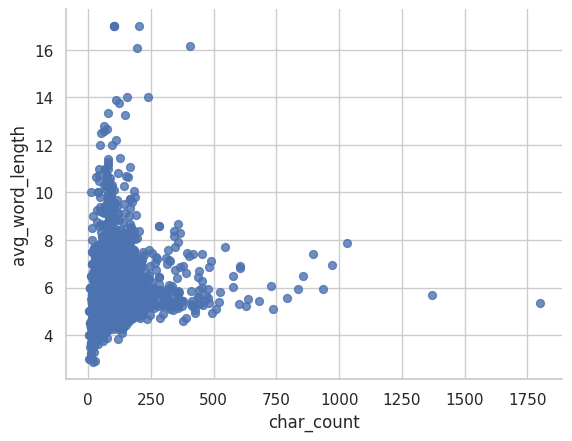

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='char_count', y='avg_word_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   message                3894 non-null   object 
 1   classification         3894 non-null   object 
 2   word_count             3894 non-null   int64  
 3   char_count             3894 non-null   int64  
 4   avg_word_length        3894 non-null   float64
 5   punctuation_count      3894 non-null   int64  
 6   link_count             3894 non-null   int64  
 7   emoji_count            3894 non-null   int64  
 8   spam_keyword_count     3894 non-null   int64  
 9   currency_symbol_count  3894 non-null   int64  
 10  phone_number_count     3894 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 334.8+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_count,3894.0,16.529019,15.296926,1.000000,7.000000,12.000000,22.000000,336.000000
char_count,3894.0,96.035953,90.537609,3.000000,38.000000,72.000000,134.000000,1800.000000
avg_word_length,3894.0,5.747556,1.282033,2.857139,4.999993,5.499993,6.184341,16.999986
punctuation_count,3894.0,3.764766,5.142873,0.000000,1.000000,2.000000,6.000000,59.000000
link_count,3894.0,0.090652,0.310365,0.000000,0.000000,0.000000,0.000000,4.000000
emoji_count,3894.0,0.148433,1.567736,0.000000,0.000000,0.000000,0.000000,49.000000
spam_keyword_count,3894.0,0.819466,1.495784,0.000000,0.000000,0.000000,1.000000,21.000000
currency_symbol_count,3894.0,0.917565,1.923033,0.000000,0.000000,0.000000,1.000000,31.000000
phone_number_count,3894.0,0.094248,0.346132,0.000000,0.000000,0.000000,0.000000,7.000000


In [ ]:
df.to_csv('enhanced_dataset.csv', index=False)

In [ ]:
df

,message,classification,word_count,char_count,avg_word_length,punctuation_count,link_count,emoji_count,spam_keyword_count,currency_symbol_count,phone_number_count
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham,15,76,5.066663,0,0,0,2,0,0
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham,10,50,4.999995,1,0,0,0,0,0
2,क्या तुमने पिछले संदेश जवाब दिया?,ham,6,33,5.499991,1,0,0,0,0,0
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam,21,155,7.380949,10,0,0,2,6,0
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam,17,114,6.705878,2,0,4,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3889,"मैं सोने रहा हूं... मुझे अब पढ़ाई मन नहीं है, ...",ham,25,140,5.599998,10,0,0,0,0,0
3890,हमने मुफ्त जियो मोबाइल + मुफ्त कैमकॉर्डर लिए ह...,spam,23,133,5.782606,1,0,0,2,0,1
3891,"मैं चाहता हूं मुझे बताएं कोलग क्या होगा, क्या ...",ham,43,235,5.465115,6,0,0,1,0,0
3892,मैं आपको प्यार हूं!,ham,4,19,4.749988,1,0,0,0,0,0


In [ ]:
df2 = df

# **4. Advanced Features**

In [ ]:
#10. english character count
import re

df2['english_char_count'] = df['message'].apply(
    lambda x: len(re.findall(r'[a-zA-Z]', x)))


In [ ]:
#11. total unique words count ( this will help us when divided with the ratio, as spam sometimes has values repeated)
df2['unique_word_count'] = df2['message'].apply(lambda x: len(set(x.split())))


In [ ]:
#12. unique ratio
df2['unique_total_ratio'] = df['unique_word_count'] / (df['word_count'])


In [ ]:
df2.head()

,message,classification,word_count,char_count,avg_word_length,punctuation_count,link_count,emoji_count,spam_keyword_count,currency_symbol_count,phone_number_count,english_char_count,unique_word_count,unique_total_ratio
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham,15,76,5.066663,0,0,0,2,0,0,0,14,0.933333
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham,10,50,4.999995,1,0,0,0,0,0,0,10,1.000000
2,क्या तुमने पिछले संदेश जवाब दिया?,ham,6,33,5.499991,1,0,0,0,0,0,0,6,1.000000
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam,21,155,7.380949,10,0,0,2,6,0,0,20,0.952381
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam,17,114,6.705878,2,0,4,2,1,1,0,17,1.000000


# **5. Readability Scores using text-stat metrics**


1.   Flesch Reading Scale
2.   Gunning Fog
3. Smog Index ( this is giving better scores)



In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


In [ ]:
#13. Readability Scores

import textstat
df3 = df2

df3['flesch_reading_ease'] = df3['message'].apply(lambda x: textstat.flesch_reading_ease(x))
df3['gunning_fog'] = df3['message'].apply(lambda x: textstat.gunning_fog(x))
df3['smog_index'] = df3['message'].apply(lambda x: textstat.smog_index(x))


In [ ]:
#I want to find an equation to calculate all three of these reading score as a single reading score using some constants.
#avg reading score = ((flesh + gunning + 2(smog))/3) 1e-2

In [ ]:
df3['average_readability'] = ((3*df3['flesch_reading_ease'] - 3*df3['gunning_fog'] - (3*(df3['smog_index'])))) / 4


In [ ]:
#14. Sentences count and length using reg-ex
import re
df3['sentence_count'] = df3['message'].apply(lambda x: len(re.split('[।|?|!]', x)))
df3['avg_sentence_length'] = df3['message'].apply(lambda x: len(x.split()) / max(1, len(re.split('[।|?|!]', x))))


In [ ]:
df3

,message,classification,word_count,char_count,avg_word_length,punctuation_count,link_count,emoji_count,spam_keyword_count,currency_symbol_count,phone_number_count,english_char_count,unique_word_count,unique_total_ratio,flesch_reading_ease,gunning_fog,smog_index,average_readability,sentence_count,avg_sentence_length
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...,ham,15,76,5.066663,0,0,0,2,0,0,0,14,0.933333,107.01,6.00,0.0,75.7575,4,3.750000
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क...",ham,10,50,4.999995,1,0,0,0,0,0,0,10,1.000000,112.09,4.00,0.0,81.0675,2,5.000000
2,क्या तुमने पिछले संदेश जवाब दिया?,ham,6,33,5.499991,1,0,0,0,0,0,0,6,1.000000,116.15,2.40,0.0,85.3125,2,3.000000
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...,spam,21,155,7.380949,10,0,0,2,6,0,0,20,0.952381,100.92,8.40,0.0,69.3900,1,21.000000
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...,spam,17,114,6.705878,2,0,4,2,1,1,0,17,1.000000,104.98,6.80,0.0,73.6350,5,3.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,"मैं सोने रहा हूं... मुझे अब पढ़ाई मन नहीं है, ...",ham,25,140,5.599998,10,0,0,0,0,0,0,23,0.920000,115.84,2.52,3.1,82.6650,2,12.500000
3890,हमने मुफ्त जियो मोबाइल + मुफ्त कैमकॉर्डर लिए ह...,spam,23,133,5.782606,1,0,0,2,0,1,0,20,0.869565,99.91,8.80,0.0,68.3325,2,11.500000
3891,"मैं चाहता हूं मुझे बताएं कोलग क्या होगा, क्या ...",ham,43,235,5.465115,6,0,0,1,0,0,0,33,0.767442,100.41,8.60,0.0,68.8575,6,7.166667
3892,मैं आपको प्यार हूं!,ham,4,19,4.749988,1,0,0,0,0,0,0,4,1.000000,118.18,1.60,0.0,87.4350,2,2.000000


In [ ]:
numeric_df = df3.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()


In [ ]:
df10 = df3

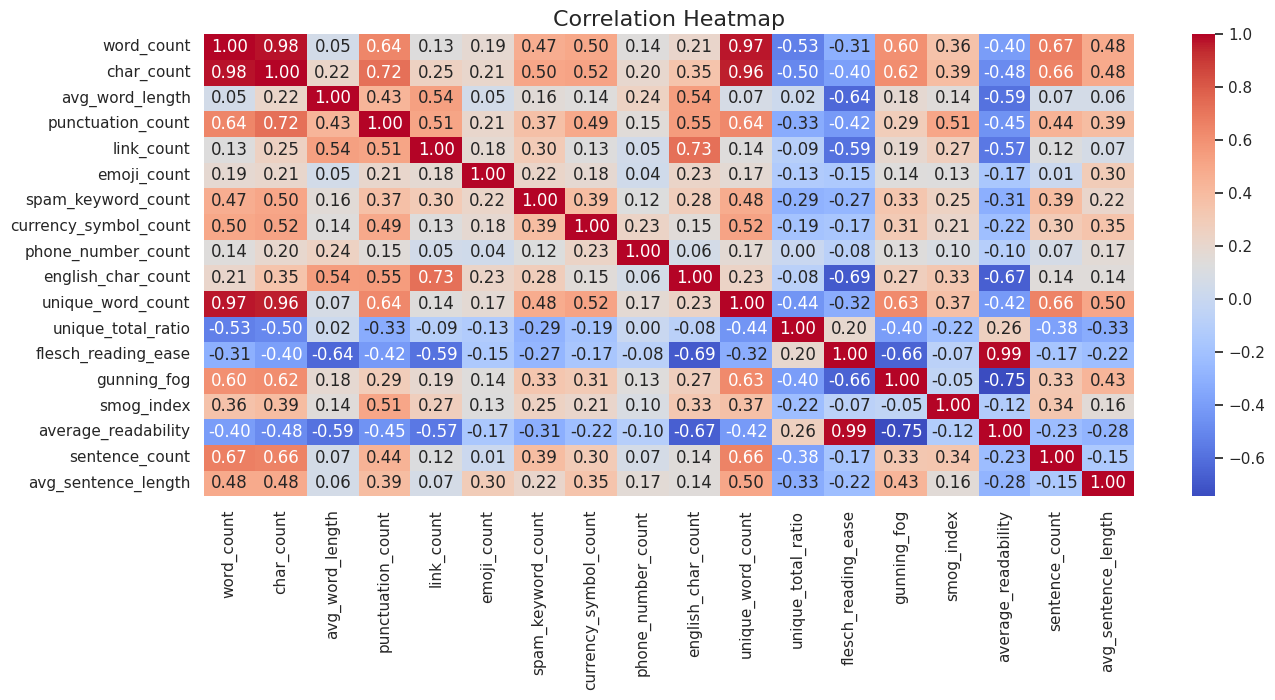

In [ ]:
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


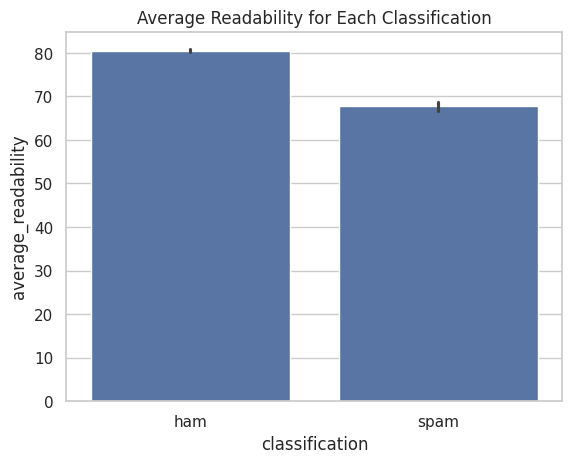

In [ ]:
sns.barplot(x='classification', y='average_readability', data=df3)
plt.title('Average Readability for Each Classification')
plt.show()

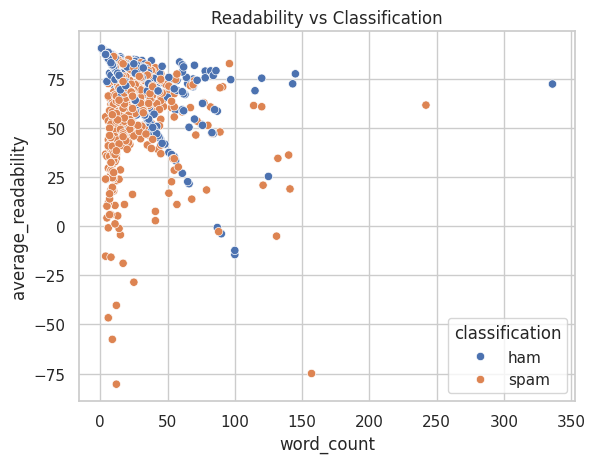

In [ ]:
sns.scatterplot(x='word_count', y='average_readability', hue='classification', data=df3)
plt.title('Readability vs Classification')
plt.show()

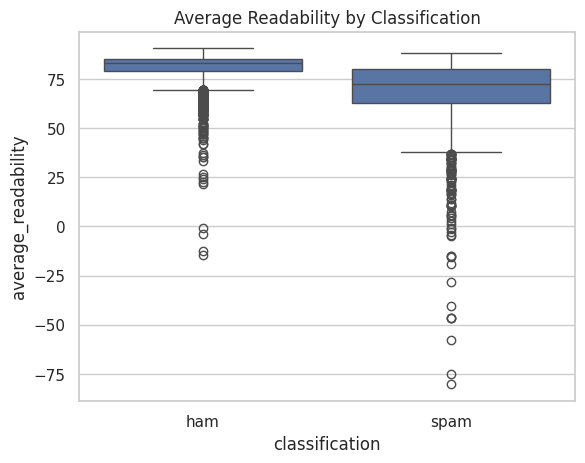

In [ ]:
sns.boxplot(x='classification', y='average_readability', data=df3)
plt.title('Average Readability by Classification')
plt.show()

In [ ]:
df3.to_excel("df3_output.xlsx", index=False)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Extract features and labels
X = df3['message']  # Text column
y = df3['classification']  # Target column (ham/spam)

# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Initialize variables to track the best random state and accuracy
best_random_state = None
best_accuracy = 0
best_report = ""

# Try different random states
for random_state in range(1, 101):  # Random states from 1 to 100
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=random_state)

    # Initialize and train the Naive Bayes model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = nb_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this random state gives better accuracy
    if accuracy > best_accuracy:
        best_random_state = random_state
        best_accuracy = accuracy
        best_report = classification_report(y_test, y_pred)

# Print the results
print(f"Best Random State: {best_random_state}")
print(f"Highest Accuracy: {best_accuracy:.2f}")
print("\nClassification Report for Best Random State:")
print(best_report)


Best Random State: 11
Highest Accuracy: 0.90

Classification Report for Best Random State:
              precision    recall  f1-score   support

         ham       0.87      0.99      0.93       510
        spam       0.97      0.72      0.83       269

    accuracy                           0.90       779
   macro avg       0.92      0.86      0.88       779
weighted avg       0.90      0.90      0.89       779



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Extract features and labels
X = df3['message']  # Text column
y = df3['classification'] # Target column (ham/spam)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

# Print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

         ham       0.88      0.98      0.93       511
        spam       0.95      0.74      0.83       268

    accuracy                           0.90       779
   macro avg       0.91      0.86      0.88       779
weighted avg       0.90      0.90      0.89       779



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score

In [ ]:
def extract_features(df3):
    features = pd.concat(
        [
            df[['word_count', 'char_count', 'avg_word_length', 'punctuation_count', 'link_count', 'emoji_count', 'spam_keyword_count', 'currency_symbol_count', 'phone_number_count', 'english_char_count', 'unique_word_count', 'unique_total_ratio', 'flesch_reading_ease', 'gunning_fog', 'smog_index', 'average_readability', 'sentence_count', 'avg_sentence_length']],
        ],
        axis=1
    )
    return features

features = extract_features(df3)

In [ ]:
# Assuming 'features' is your DataFrame with extracted features and 'labels' is your target
X = features  # Features
y = df['classification']    # Labels

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [ ]:

model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.68%


In [ ]:
!pip install lazypredict

In [ ]:
!import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

/bin/bash: line 1: import: command not found


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 84%|████████▍ | 27/32 [00:10<00:02,  2.08it/s]

[LightGBM] [Info] Number of positive: 1132, number of negative: 1983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1443
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363403 -> initscore=-0.560625
[LightGBM] [Info] Start training from score -0.560625


100%|██████████| 32/32 [00:10<00:00,  2.95it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.92               0.92    None      0.92   
BaggingClassifier                  0.92               0.92    None      0.92   
SVC                                0.92               0.91    None      0.92   
RandomForestClassifier             0.92               0.91    None      0.92   
LGBMClassifier                     0.91               0.91    None      0.91   
SGDClassifier                      0.91               0.91    None      0.91   
KNeighborsClassifier               0.92               0.90    None      0.92   
CalibratedClassifierCV             0.91               0.89    None      0.91   
LinearSVC                          0.91               0.89    None      0.91   
LogisticRegression                 0.90               0.88    None      0.90   
LabelSpreading                     0.90 

In [ ]:
def extract_features(df3):
    features = pd.concat(
        [
            df[['word_count', 'char_count', 'avg_word_length', 'punctuation_count', 'link_count', 'emoji_count', 'spam_keyword_count', 'currency_symbol_count', 'phone_number_count', 'english_char_count', 'unique_word_count', 'unique_total_ratio', 'flesch_reading_ease', 'gunning_fog', 'smog_index', 'average_readability', 'sentence_count', 'avg_sentence_length']],
        ],
        axis=1
    )
    return features

features = extract_features(df)

In [ ]:
a , b = df3['message'] , df3['classification']

In [ ]:
a.head()

,message
0,डॉलर ख़रीदारी ख़रीदारी लिए घर जाएँ समय। मैं हि...
1,"हर छोटी कोशिश बड़ा परिणाम है, उसे नजरअंदाज न क..."
2,क्या तुमने पिछले संदेश जवाब दिया?
3,प्रति जोड़ा *मनाली 3एन/4डी@14 999 *शिमला 2एन3ड...
4,बिबाह समस्या?❤️ प्यार पाने सही तरीका जानिए।🌟 1...


In [ ]:
import nltk

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def hindi_tokenizer(text):
    words = nltk.word_tokenize(text,language='hindi',preserve_line=True)
    return words

tfidf = TfidfVectorizer(tokenizer=hindi_tokenizer)
a_vect = tfidf.fit_transform(a)

In [ ]:
a_vect.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16782493, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28067671, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a_vect, b, random_state=0)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
svm = SVC(kernel='linear',random_state=0)

In [ ]:
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9507186858316222

In [ ]:
df3.to_csv('/content/df3.csv', index=False)


# **Binary Class**

In [ ]:
df5=df3

In [ ]:
df5.drop('message', axis=1, inplace=True)

In [ ]:

df5['classification'] = df5['classification'].map({'spam': 1, 'ham': 0})

In [ ]:
df5.drop('smog_index', axis=1, inplace=True)

In [ ]:

df5['char_count'] = df5['char_count'].apply(lambda x: 1 if x > 75 else 0)

In [ ]:
df5['avg_word_length'] = df5['avg_word_length'].apply(lambda x: 1 if x > 5.4 else 0)

In [ ]:
df5['punctuation_count'] = df5['punctuation_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['link_count'] = df5['link_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['emoji_count'] = df5['emoji_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['spam_keyword_count'] = df5['spam_keyword_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['currency_symbol_count'] = df5['currency_symbol_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['phone_number_count'] = df5['phone_number_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5['english_char_count'] = df5['english_char_count'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df5.drop('unique_word_count', axis=1, inplace=True)

In [ ]:
df5['unique_total_ratio'] = df5['unique_total_ratio'].apply(lambda x: 1 if x < 0.98 else 0)

In [ ]:
df5['flesch_reading_ease'] = df5['flesch_reading_ease'].apply(lambda x: 1 if x < 105 else 0)

In [ ]:
df5['gunning_fog'] = df5['gunning_fog'].apply(lambda x: 1 if x > 4.6 else 0)

In [ ]:
df5['average_readability'] = df5['average_readability'].apply(lambda x: 1 if x < 79.22 else 0)

In [ ]:
df5.drop('sentence_count', axis=1, inplace=True)

In [ ]:
df5['avg_sentence_length'] = df5['avg_sentence_length'].apply(lambda x: 1 if x > 11 else 0)

In [ ]:
df5.drop('word_count', axis=1, inplace=True)

In [ ]:
df5

,classification,char_count,avg_word_length,punctuation_count,link_count,emoji_count,spam_keyword_count,currency_symbol_count,phone_number_count,english_char_count,unique_total_ratio,flesch_reading_ease,gunning_fog,average_readability,avg_sentence_length
0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1
4,1,1,1,1,0,1,1,1,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1
3890,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1
3891,0,1,1,1,0,0,1,0,0,0,1,1,1,1,0
3892,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_save = df5

In [ ]:
# prompt: download and save df_save

from google.colab import files
df_save.to_csv('df_save.csv', encoding = 'utf-8-sig')
files.download('df_save.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **SHAP**

In [ ]:
df7=df_save

In [ ]:
if "Unnamed: 0" in df_save.columns:
    df_save = df_save.drop(columns=["Unnamed: 0"])

In [ ]:
df_save

,classification,char_count,avg_word_length,punctuation_count,link_count,emoji_count,spam_keyword_count,currency_symbol_count,phone_number_count,english_char_count,unique_total_ratio,flesch_reading_ease,gunning_fog,average_readability,avg_sentence_length
0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1
4,1,1,1,1,0,1,1,1,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1
3890,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1
3891,0,1,1,1,0,0,1,0,0,0,1,1,1,1,0
3892,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install shap

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
import shap as shap

 99%|===================| 3080/3115 [00:51<00:00]       

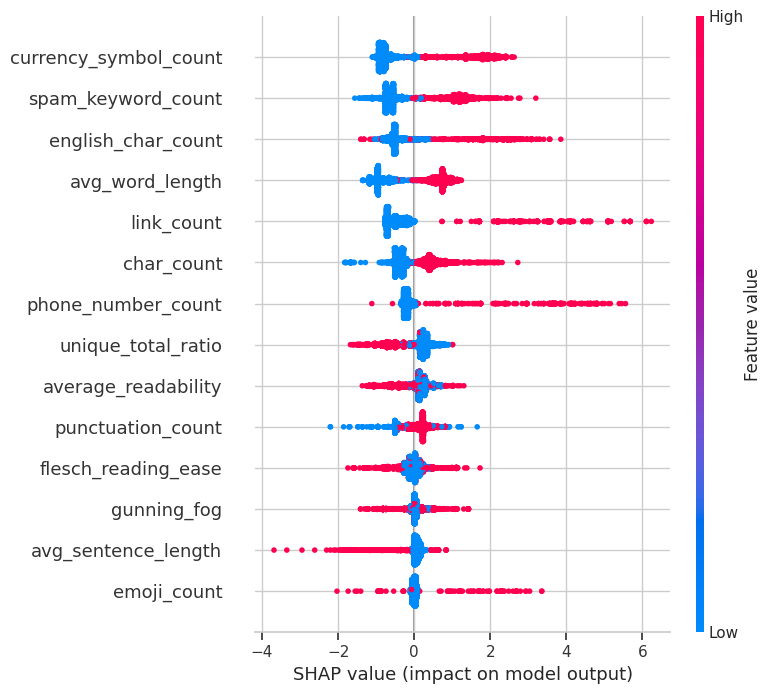

In [ ]:
if "Unnamed: 0" in df_save.columns:
    df_save = df_save.drop(columns=["Unnamed: 0"])

X = df_save.drop(columns=["classification"])
y = df_save["classification"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(
    objective="binary:logistic",
    max_depth=3,
    n_estimators=1000,
    use_label_encoder=False,
    eval_metric="logloss"
)
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)


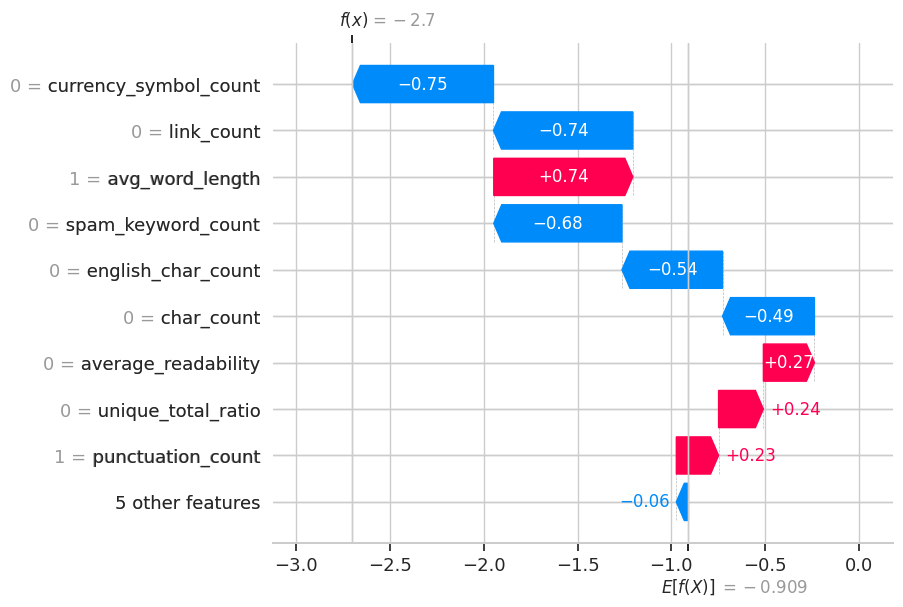

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
df4=df_save

In [ ]:
def extract_features(df4):
    features = pd.concat(
        [
            df[[ 'char_count', 'avg_word_length', 'punctuation_count', 'link_count', 'emoji_count', 'spam_keyword_count', 'currency_symbol_count', 'phone_number_count', 'english_char_count', 'unique_total_ratio', 'flesch_reading_ease', 'gunning_fog', 'average_readability', 'avg_sentence_length']],
        ],
        axis=1
    )
    return features

features = extract_features(df4)

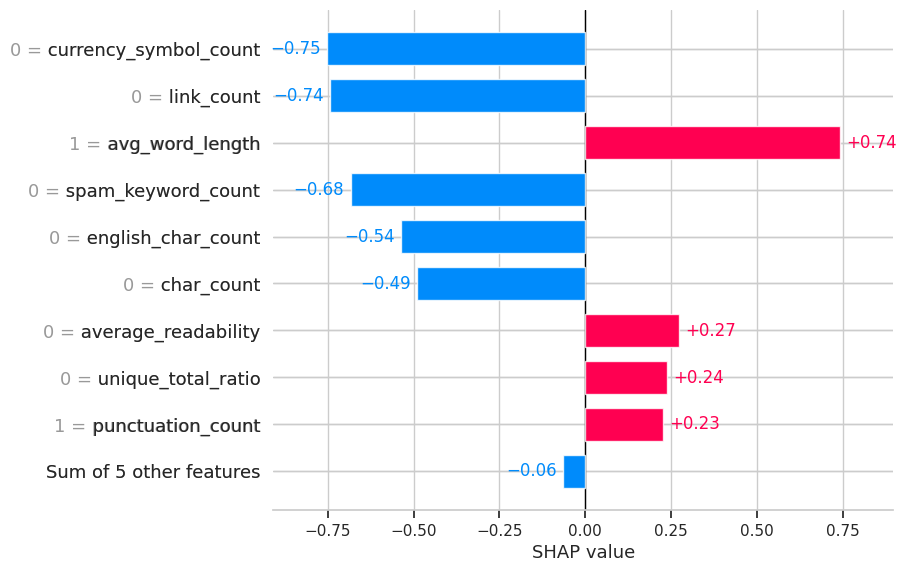

In [ ]:
shap.plots.bar(shap_values[1])

In [ ]:
df6 = pd.read_csv('enhanced_dataset.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Extract features and labels
X = df6['message']  # Text column
y = df6['classification']  # Target column (ham/spam)

# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Initialize variables to track the best random state and accuracy
best_random_state = None
best_accuracy = 0
best_report = ""

# Try different random states
for random_state in range(1, 101):  # Random states from 1 to 100
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=random_state)

    # Initialize and train the Naive Bayes model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = nb_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this random state gives better accuracy
    if accuracy > best_accuracy:
        best_random_state = random_state
        best_accuracy = accuracy
        best_report = classification_report(y_test, y_pred)

# Print the results
print(f"Best Random State: {best_random_state}")
print(f"Highest Accuracy: {best_accuracy:.2f}")
print("\nClassification Report for Best Random State:")
print(best_report)

Best Random State: 11
Highest Accuracy: 0.90

Classification Report for Best Random State:
              precision    recall  f1-score   support

         ham       0.87      0.99      0.93       510
        spam       0.97      0.72      0.83       269

    accuracy                           0.90       779
   macro avg       0.92      0.86      0.88       779
weighted avg       0.90      0.90      0.89       779



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score

In [ ]:
df6=df_save

In [ ]:
def extract_features(df6):
    features = pd.concat(
        [
            df[['link_count', 'currency_symbol_count', 'avg_word_length', 'english_char_count', 'char_count', 'unique_total_ratio', 'punctuation_count', 'average_readability']],
        ],
        axis=1
    )
    return features

features = extract_features(df6)

In [ ]:
# Assuming 'features' is your DataFrame with extracted features and 'labels' is your target
X = features  # Features}
y = df['classification']    # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=54)

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 32/32 [00:04<00:00,  7.79it/s]

[LightGBM] [Info] Number of positive: 1108, number of negative: 2007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355698 -> initscore=-0.594084
[LightGBM] [Info] Start training from score -0.594084
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.86               0.86     0.86      0.86   
BaggingClassifier                  0.86               0.85     0.85      0.86   
DecisionTreeClassifier             0.86               0.85     0.85      0.86   
Perceptron                         0.85    

In [ ]:

random_states = range(1, 101)  # Test random states from 1 to 100

# Initialize variables to store the best results
best_random_state = None
best_accuracy = 0.0
best_model_results = None

# Loop through random states
for random_state in random_states:
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Initialize LazyClassifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

    # Fit and predict using LazyClassifier
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)

    # Find the highest accuracy among all models for the current random state
    max_accuracy = models["Accuracy"].max()

    # Check if this is the best accuracy so far
    if max_accuracy > best_accuracy:
        best_accuracy = max_accuracy
        best_random_state = random_state
        best_model_results = models

# Print the best results
print(f"Best Random State: {best_random_state}")
print(f"Best Accuracy: {best_accuracy}")
print("Best Model Results:")
print(best_model_results)


100%|██████████| 32/32 [00:04<00:00,  7.74it/s]


[LightGBM] [Info] Number of positive: 1112, number of negative: 2003
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356982 -> initscore=-0.588486
[LightGBM] [Info] Start training from score -0.588486


100%|██████████| 32/32 [00:03<00:00,  9.38it/s]


[LightGBM] [Info] Number of positive: 1099, number of negative: 2016
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.352809 -> initscore=-0.606715
[LightGBM] [Info] Start training from score -0.606715


100%|██████████| 32/32 [00:03<00:00,  9.60it/s]


[LightGBM] [Info] Number of positive: 1133, number of negative: 1982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363724 -> initscore=-0.559237
[LightGBM] [Info] Start training from score -0.559237


100%|██████████| 32/32 [00:05<00:00,  6.07it/s]


[LightGBM] [Info] Number of positive: 1123, number of negative: 1992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360514 -> initscore=-0.573135
[LightGBM] [Info] Start training from score -0.573135


100%|██████████| 32/32 [00:03<00:00,  9.56it/s]


[LightGBM] [Info] Number of positive: 1132, number of negative: 1983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363403 -> initscore=-0.560625
[LightGBM] [Info] Start training from score -0.560625


100%|██████████| 32/32 [00:03<00:00,  9.34it/s]


[LightGBM] [Info] Number of positive: 1119, number of negative: 1996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359230 -> initscore=-0.578710
[LightGBM] [Info] Start training from score -0.578710


100%|██████████| 32/32 [00:03<00:00,  9.13it/s]


[LightGBM] [Info] Number of positive: 1126, number of negative: 1989
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361477 -> initscore=-0.568960
[LightGBM] [Info] Start training from score -0.568960


100%|██████████| 32/32 [00:04<00:00,  7.02it/s]


[LightGBM] [Info] Number of positive: 1111, number of negative: 2004
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356661 -> initscore=-0.589885
[LightGBM] [Info] Start training from score -0.589885


100%|██████████| 32/32 [00:03<00:00,  9.43it/s]


[LightGBM] [Info] Number of positive: 1101, number of negative: 2014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353451 -> initscore=-0.603904
[LightGBM] [Info] Start training from score -0.603904


100%|██████████| 32/32 [00:03<00:00,  9.56it/s]


[LightGBM] [Info] Number of positive: 1126, number of negative: 1989
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361477 -> initscore=-0.568960
[LightGBM] [Info] Start training from score -0.568960


100%|██████████| 32/32 [00:04<00:00,  7.46it/s]


[LightGBM] [Info] Number of positive: 1135, number of negative: 1980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364366 -> initscore=-0.556464
[LightGBM] [Info] Start training from score -0.556464


100%|██████████| 32/32 [00:03<00:00,  8.51it/s]


[LightGBM] [Info] Number of positive: 1115, number of negative: 2000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357945 -> initscore=-0.584293
[LightGBM] [Info] Start training from score -0.584293


100%|██████████| 32/32 [00:03<00:00,  9.76it/s]


[LightGBM] [Info] Number of positive: 1117, number of negative: 1998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358587 -> initscore=-0.581500
[LightGBM] [Info] Start training from score -0.581500


100%|██████████| 32/32 [00:03<00:00,  9.66it/s]


[LightGBM] [Info] Number of positive: 1151, number of negative: 1964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369502 -> initscore=-0.534352
[LightGBM] [Info] Start training from score -0.534352


100%|██████████| 32/32 [00:04<00:00,  6.46it/s]


[LightGBM] [Info] Number of positive: 1136, number of negative: 1979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364687 -> initscore=-0.555078
[LightGBM] [Info] Start training from score -0.555078


100%|██████████| 32/32 [00:03<00:00,  9.68it/s]


[LightGBM] [Info] Number of positive: 1137, number of negative: 1978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365008 -> initscore=-0.553693
[LightGBM] [Info] Start training from score -0.553693


100%|██████████| 32/32 [00:03<00:00,  9.65it/s]


[LightGBM] [Info] Number of positive: 1105, number of negative: 2010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354735 -> initscore=-0.598289
[LightGBM] [Info] Start training from score -0.598289


100%|██████████| 32/32 [00:03<00:00,  9.19it/s]


[LightGBM] [Info] Number of positive: 1127, number of negative: 1988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361798 -> initscore=-0.567570
[LightGBM] [Info] Start training from score -0.567570


100%|██████████| 32/32 [00:04<00:00,  6.53it/s]


[LightGBM] [Info] Number of positive: 1136, number of negative: 1979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364687 -> initscore=-0.555078
[LightGBM] [Info] Start training from score -0.555078


100%|██████████| 32/32 [00:03<00:00,  9.55it/s]


[LightGBM] [Info] Number of positive: 1110, number of negative: 2005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356340 -> initscore=-0.591284
[LightGBM] [Info] Start training from score -0.591284


100%|██████████| 32/32 [00:03<00:00,  9.80it/s]


[LightGBM] [Info] Number of positive: 1108, number of negative: 2007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355698 -> initscore=-0.594084
[LightGBM] [Info] Start training from score -0.594084


100%|██████████| 32/32 [00:03<00:00,  8.23it/s]


[LightGBM] [Info] Number of positive: 1113, number of negative: 2002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357303 -> initscore=-0.587088
[LightGBM] [Info] Start training from score -0.587088


100%|██████████| 32/32 [00:04<00:00,  7.57it/s]


[LightGBM] [Info] Number of positive: 1137, number of negative: 1978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365008 -> initscore=-0.553693
[LightGBM] [Info] Start training from score -0.553693


100%|██████████| 32/32 [00:03<00:00,  9.84it/s]


[LightGBM] [Info] Number of positive: 1117, number of negative: 1998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358587 -> initscore=-0.581500
[LightGBM] [Info] Start training from score -0.581500


100%|██████████| 32/32 [00:03<00:00,  9.66it/s]


[LightGBM] [Info] Number of positive: 1129, number of negative: 1986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362440 -> initscore=-0.564790
[LightGBM] [Info] Start training from score -0.564790


100%|██████████| 32/32 [00:04<00:00,  7.27it/s]


[LightGBM] [Info] Number of positive: 1148, number of negative: 1967
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368539 -> initscore=-0.538488
[LightGBM] [Info] Start training from score -0.538488


100%|██████████| 32/32 [00:03<00:00,  8.47it/s]


[LightGBM] [Info] Number of positive: 1122, number of negative: 1993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360193 -> initscore=-0.574528
[LightGBM] [Info] Start training from score -0.574528


100%|██████████| 32/32 [00:03<00:00,  9.89it/s]


[LightGBM] [Info] Number of positive: 1136, number of negative: 1979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364687 -> initscore=-0.555078
[LightGBM] [Info] Start training from score -0.555078


100%|██████████| 32/32 [00:03<00:00,  9.44it/s]


[LightGBM] [Info] Number of positive: 1124, number of negative: 1991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360835 -> initscore=-0.571743
[LightGBM] [Info] Start training from score -0.571743


100%|██████████| 32/32 [00:04<00:00,  7.07it/s]


[LightGBM] [Info] Number of positive: 1128, number of negative: 1987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362119 -> initscore=-0.566180
[LightGBM] [Info] Start training from score -0.566180


100%|██████████| 32/32 [00:03<00:00,  9.73it/s]


[LightGBM] [Info] Number of positive: 1132, number of negative: 1983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363403 -> initscore=-0.560625
[LightGBM] [Info] Start training from score -0.560625


100%|██████████| 32/32 [00:03<00:00,  9.58it/s]


[LightGBM] [Info] Number of positive: 1140, number of negative: 1975
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365971 -> initscore=-0.549540
[LightGBM] [Info] Start training from score -0.549540


100%|██████████| 32/32 [00:03<00:00,  8.82it/s]


[LightGBM] [Info] Number of positive: 1119, number of negative: 1996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359230 -> initscore=-0.578710
[LightGBM] [Info] Start training from score -0.578710


100%|██████████| 32/32 [00:04<00:00,  7.12it/s]


[LightGBM] [Info] Number of positive: 1132, number of negative: 1983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363403 -> initscore=-0.560625
[LightGBM] [Info] Start training from score -0.560625


100%|██████████| 32/32 [00:03<00:00,  9.65it/s]


[LightGBM] [Info] Number of positive: 1137, number of negative: 1978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365008 -> initscore=-0.553693
[LightGBM] [Info] Start training from score -0.553693


100%|██████████| 32/32 [00:03<00:00,  9.81it/s]


[LightGBM] [Info] Number of positive: 1129, number of negative: 1986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362440 -> initscore=-0.564790
[LightGBM] [Info] Start training from score -0.564790


100%|██████████| 32/32 [00:04<00:00,  7.40it/s]


[LightGBM] [Info] Number of positive: 1091, number of negative: 2024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350241 -> initscore=-0.617981
[LightGBM] [Info] Start training from score -0.617981


100%|██████████| 32/32 [00:03<00:00,  8.22it/s]


[LightGBM] [Info] Number of positive: 1110, number of negative: 2005
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356340 -> initscore=-0.591284
[LightGBM] [Info] Start training from score -0.591284


100%|██████████| 32/32 [00:03<00:00,  8.68it/s]


[LightGBM] [Info] Number of positive: 1114, number of negative: 2001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357624 -> initscore=-0.585690
[LightGBM] [Info] Start training from score -0.585690


100%|██████████| 32/32 [00:03<00:00,  9.41it/s]


[LightGBM] [Info] Number of positive: 1120, number of negative: 1995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359551 -> initscore=-0.577315
[LightGBM] [Info] Start training from score -0.577315


100%|██████████| 32/32 [00:04<00:00,  6.66it/s]


[LightGBM] [Info] Number of positive: 1120, number of negative: 1995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359551 -> initscore=-0.577315
[LightGBM] [Info] Start training from score -0.577315


100%|██████████| 32/32 [00:03<00:00,  9.72it/s]


[LightGBM] [Info] Number of positive: 1156, number of negative: 1959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371108 -> initscore=-0.527468
[LightGBM] [Info] Start training from score -0.527468


100%|██████████| 32/32 [00:03<00:00,  9.94it/s]


[LightGBM] [Info] Number of positive: 1113, number of negative: 2002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357303 -> initscore=-0.587088
[LightGBM] [Info] Start training from score -0.587088


100%|██████████| 32/32 [00:04<00:00,  7.71it/s]


[LightGBM] [Info] Number of positive: 1123, number of negative: 1992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360514 -> initscore=-0.573135
[LightGBM] [Info] Start training from score -0.573135


100%|██████████| 32/32 [00:04<00:00,  7.74it/s]


[LightGBM] [Info] Number of positive: 1129, number of negative: 1986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362440 -> initscore=-0.564790
[LightGBM] [Info] Start training from score -0.564790


100%|██████████| 32/32 [00:03<00:00,  9.63it/s]


[LightGBM] [Info] Number of positive: 1123, number of negative: 1992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360514 -> initscore=-0.573135
[LightGBM] [Info] Start training from score -0.573135


100%|██████████| 32/32 [00:03<00:00,  9.43it/s]


[LightGBM] [Info] Number of positive: 1139, number of negative: 1976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365650 -> initscore=-0.550924
[LightGBM] [Info] Start training from score -0.550924


100%|██████████| 32/32 [00:04<00:00,  7.33it/s]


[LightGBM] [Info] Number of positive: 1118, number of negative: 1997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358909 -> initscore=-0.580105
[LightGBM] [Info] Start training from score -0.580105


100%|██████████| 32/32 [00:03<00:00,  8.58it/s]


[LightGBM] [Info] Number of positive: 1133, number of negative: 1982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363724 -> initscore=-0.559237
[LightGBM] [Info] Start training from score -0.559237


100%|██████████| 32/32 [00:03<00:00,  9.89it/s]


[LightGBM] [Info] Number of positive: 1124, number of negative: 1991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360835 -> initscore=-0.571743
[LightGBM] [Info] Start training from score -0.571743


100%|██████████| 32/32 [00:03<00:00,  9.44it/s]


[LightGBM] [Info] Number of positive: 1126, number of negative: 1989
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361477 -> initscore=-0.568960
[LightGBM] [Info] Start training from score -0.568960


100%|██████████| 32/32 [00:04<00:00,  6.53it/s]


[LightGBM] [Info] Number of positive: 1131, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363082 -> initscore=-0.562013
[LightGBM] [Info] Start training from score -0.562013


100%|██████████| 32/32 [00:03<00:00,  9.91it/s]


[LightGBM] [Info] Number of positive: 1142, number of negative: 1973
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366613 -> initscore=-0.546774
[LightGBM] [Info] Start training from score -0.546774


100%|██████████| 32/32 [00:03<00:00,  9.59it/s]


[LightGBM] [Info] Number of positive: 1108, number of negative: 2007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355698 -> initscore=-0.594084
[LightGBM] [Info] Start training from score -0.594084


100%|██████████| 32/32 [00:03<00:00,  9.78it/s]


[LightGBM] [Info] Number of positive: 1131, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363082 -> initscore=-0.562013
[LightGBM] [Info] Start training from score -0.562013


100%|██████████| 32/32 [00:04<00:00,  6.69it/s]


[LightGBM] [Info] Number of positive: 1106, number of negative: 2009
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355056 -> initscore=-0.596887
[LightGBM] [Info] Start training from score -0.596887


100%|██████████| 32/32 [00:03<00:00,  9.70it/s]


[LightGBM] [Info] Number of positive: 1117, number of negative: 1998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358587 -> initscore=-0.581500
[LightGBM] [Info] Start training from score -0.581500


100%|██████████| 32/32 [00:03<00:00,  9.69it/s]


[LightGBM] [Info] Number of positive: 1132, number of negative: 1983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363403 -> initscore=-0.560625
[LightGBM] [Info] Start training from score -0.560625


100%|██████████| 32/32 [00:04<00:00,  7.84it/s]


[LightGBM] [Info] Number of positive: 1105, number of negative: 2010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354735 -> initscore=-0.598289
[LightGBM] [Info] Start training from score -0.598289


100%|██████████| 32/32 [00:04<00:00,  7.66it/s]


[LightGBM] [Info] Number of positive: 1113, number of negative: 2002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357303 -> initscore=-0.587088
[LightGBM] [Info] Start training from score -0.587088


100%|██████████| 32/32 [00:03<00:00,  9.70it/s]


[LightGBM] [Info] Number of positive: 1103, number of negative: 2012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354093 -> initscore=-0.601096
[LightGBM] [Info] Start training from score -0.601096


100%|██████████| 32/32 [00:03<00:00,  9.69it/s]


[LightGBM] [Info] Number of positive: 1136, number of negative: 1979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364687 -> initscore=-0.555078
[LightGBM] [Info] Start training from score -0.555078


100%|██████████| 32/32 [00:04<00:00,  7.20it/s]


[LightGBM] [Info] Number of positive: 1107, number of negative: 2008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355377 -> initscore=-0.595486
[LightGBM] [Info] Start training from score -0.595486


100%|██████████| 32/32 [00:03<00:00,  8.82it/s]


[LightGBM] [Info] Number of positive: 1101, number of negative: 2014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353451 -> initscore=-0.603904
[LightGBM] [Info] Start training from score -0.603904


100%|██████████| 32/32 [00:03<00:00,  9.80it/s]


[LightGBM] [Info] Number of positive: 1105, number of negative: 2010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354735 -> initscore=-0.598289
[LightGBM] [Info] Start training from score -0.598289


100%|██████████| 32/32 [00:03<00:00,  9.64it/s]


[LightGBM] [Info] Number of positive: 1136, number of negative: 1979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364687 -> initscore=-0.555078
[LightGBM] [Info] Start training from score -0.555078


100%|██████████| 32/32 [00:04<00:00,  6.88it/s]


[LightGBM] [Info] Number of positive: 1122, number of negative: 1993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360193 -> initscore=-0.574528
[LightGBM] [Info] Start training from score -0.574528


100%|██████████| 32/32 [00:03<00:00,  9.52it/s]


[LightGBM] [Info] Number of positive: 1113, number of negative: 2002
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357303 -> initscore=-0.587088
[LightGBM] [Info] Start training from score -0.587088


100%|██████████| 32/32 [00:03<00:00,  9.81it/s]


[LightGBM] [Info] Number of positive: 1117, number of negative: 1998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358587 -> initscore=-0.581500
[LightGBM] [Info] Start training from score -0.581500


100%|██████████| 32/32 [00:03<00:00,  8.76it/s]


[LightGBM] [Info] Number of positive: 1111, number of negative: 2004
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356661 -> initscore=-0.589885
[LightGBM] [Info] Start training from score -0.589885


100%|██████████| 32/32 [00:04<00:00,  7.52it/s]


[LightGBM] [Info] Number of positive: 1089, number of negative: 2026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349599 -> initscore=-0.620804
[LightGBM] [Info] Start training from score -0.620804


100%|██████████| 32/32 [00:03<00:00,  9.54it/s]


[LightGBM] [Info] Number of positive: 1107, number of negative: 2008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355377 -> initscore=-0.595486
[LightGBM] [Info] Start training from score -0.595486


100%|██████████| 32/32 [00:03<00:00,  9.51it/s]


[LightGBM] [Info] Number of positive: 1108, number of negative: 2007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355698 -> initscore=-0.594084
[LightGBM] [Info] Start training from score -0.594084


100%|██████████| 32/32 [00:03<00:00,  8.09it/s]


[LightGBM] [Info] Number of positive: 1131, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363082 -> initscore=-0.562013
[LightGBM] [Info] Start training from score -0.562013


100%|██████████| 32/32 [00:04<00:00,  7.71it/s]


[LightGBM] [Info] Number of positive: 1131, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363082 -> initscore=-0.562013
[LightGBM] [Info] Start training from score -0.562013


100%|██████████| 32/32 [00:03<00:00,  9.89it/s]


[LightGBM] [Info] Number of positive: 1104, number of negative: 2011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354414 -> initscore=-0.599692
[LightGBM] [Info] Start training from score -0.599692


100%|██████████| 32/32 [00:03<00:00,  9.59it/s]


[LightGBM] [Info] Number of positive: 1125, number of negative: 1990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361156 -> initscore=-0.570352
[LightGBM] [Info] Start training from score -0.570352


100%|██████████| 32/32 [00:05<00:00,  5.92it/s]


[LightGBM] [Info] Number of positive: 1109, number of negative: 2006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.356019 -> initscore=-0.592684
[LightGBM] [Info] Start training from score -0.592684


100%|██████████| 32/32 [00:03<00:00,  9.60it/s]


[LightGBM] [Info] Number of positive: 1131, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363082 -> initscore=-0.562013
[LightGBM] [Info] Start training from score -0.562013


100%|██████████| 32/32 [00:03<00:00,  9.79it/s]


[LightGBM] [Info] Number of positive: 1107, number of negative: 2008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355377 -> initscore=-0.595486
[LightGBM] [Info] Start training from score -0.595486


100%|██████████| 32/32 [00:03<00:00,  9.65it/s]


[LightGBM] [Info] Number of positive: 1151, number of negative: 1964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369502 -> initscore=-0.534352
[LightGBM] [Info] Start training from score -0.534352


100%|██████████| 32/32 [00:04<00:00,  6.72it/s]


[LightGBM] [Info] Number of positive: 1114, number of negative: 2001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357624 -> initscore=-0.585690
[LightGBM] [Info] Start training from score -0.585690


100%|██████████| 32/32 [00:03<00:00,  9.55it/s]


[LightGBM] [Info] Number of positive: 1131, number of negative: 1984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363082 -> initscore=-0.562013
[LightGBM] [Info] Start training from score -0.562013


100%|██████████| 32/32 [00:03<00:00,  9.51it/s]


[LightGBM] [Info] Number of positive: 1124, number of negative: 1991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360835 -> initscore=-0.571743
[LightGBM] [Info] Start training from score -0.571743


100%|██████████| 32/32 [00:03<00:00,  8.37it/s]


[LightGBM] [Info] Number of positive: 1121, number of negative: 1994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359872 -> initscore=-0.575922
[LightGBM] [Info] Start training from score -0.575922


100%|██████████| 32/32 [00:04<00:00,  7.48it/s]


[LightGBM] [Info] Number of positive: 1130, number of negative: 1985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362761 -> initscore=-0.563401
[LightGBM] [Info] Start training from score -0.563401


100%|██████████| 32/32 [00:03<00:00,  9.33it/s]


[LightGBM] [Info] Number of positive: 1119, number of negative: 1996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359230 -> initscore=-0.578710
[LightGBM] [Info] Start training from score -0.578710


100%|██████████| 32/32 [00:03<00:00,  9.49it/s]


[LightGBM] [Info] Number of positive: 1139, number of negative: 1976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365650 -> initscore=-0.550924
[LightGBM] [Info] Start training from score -0.550924


100%|██████████| 32/32 [00:04<00:00,  7.44it/s]


[LightGBM] [Info] Number of positive: 1128, number of negative: 1987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362119 -> initscore=-0.566180
[LightGBM] [Info] Start training from score -0.566180


100%|██████████| 32/32 [00:03<00:00,  8.35it/s]


[LightGBM] [Info] Number of positive: 1126, number of negative: 1989
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361477 -> initscore=-0.568960
[LightGBM] [Info] Start training from score -0.568960


100%|██████████| 32/32 [00:03<00:00,  9.39it/s]


[LightGBM] [Info] Number of positive: 1114, number of negative: 2001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357624 -> initscore=-0.585690
[LightGBM] [Info] Start training from score -0.585690


100%|██████████| 32/32 [00:03<00:00,  9.52it/s]


[LightGBM] [Info] Number of positive: 1100, number of negative: 2015
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353130 -> initscore=-0.605309
[LightGBM] [Info] Start training from score -0.605309


100%|██████████| 32/32 [00:04<00:00,  6.99it/s]


[LightGBM] [Info] Number of positive: 1144, number of negative: 1971
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367255 -> initscore=-0.544010
[LightGBM] [Info] Start training from score -0.544010


100%|██████████| 32/32 [00:03<00:00,  9.27it/s]


[LightGBM] [Info] Number of positive: 1130, number of negative: 1985
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362761 -> initscore=-0.563401
[LightGBM] [Info] Start training from score -0.563401


100%|██████████| 32/32 [00:03<00:00,  9.79it/s]


[LightGBM] [Info] Number of positive: 1124, number of negative: 1991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360835 -> initscore=-0.571743
[LightGBM] [Info] Start training from score -0.571743


100%|██████████| 32/32 [00:03<00:00,  8.93it/s]


[LightGBM] [Info] Number of positive: 1126, number of negative: 1989
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.361477 -> initscore=-0.568960
[LightGBM] [Info] Start training from score -0.568960


100%|██████████| 32/32 [00:04<00:00,  7.20it/s]


[LightGBM] [Info] Number of positive: 1124, number of negative: 1991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360835 -> initscore=-0.571743
[LightGBM] [Info] Start training from score -0.571743


100%|██████████| 32/32 [00:03<00:00,  9.67it/s]


[LightGBM] [Info] Number of positive: 1136, number of negative: 1979
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364687 -> initscore=-0.555078
[LightGBM] [Info] Start training from score -0.555078


100%|██████████| 32/32 [00:03<00:00,  9.46it/s]


[LightGBM] [Info] Number of positive: 1120, number of negative: 1995
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359551 -> initscore=-0.577315
[LightGBM] [Info] Start training from score -0.577315


100%|██████████| 32/32 [00:04<00:00,  7.55it/s]

[LightGBM] [Info] Number of positive: 1124, number of negative: 1991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360835 -> initscore=-0.571743
[LightGBM] [Info] Start training from score -0.571743
Best Random State: 42
Best Accuracy: 0.9062901155327343
Best Model Results:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.90               0.90     0.90      0.90   
ExtraTreeClassifier                0.91               0.89     0.89      0.91   
LabelSpreading                     0.90         